In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_csv("WorldPopulation2023.csv")

%matplotlib inline

# Exploratory Data Analysis

In [352]:
data.head()

,Rank,Country,Population2023,YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop%,WorldShare
0,36,Afghanistan,42239854,2.70 %,1111083,65,652860,-65846,4.4,17.0,26 %,0.53 %
1,138,Albania,2832439,-0.35 %,-9882,103,27400,-8000,1.4,38.0,67 %,0.04 %
2,34,Algeria,45606480,1.57 %,703255,19,2381740,-9999,2.8,28.0,75 %,0.57 %
3,212,American Samoa,43914,-0.81 %,-359,220,200,-790,2.2,29.0,N.A.,0.00 %
4,202,Andorra,80088,0.33 %,264,170,470,200,1.1,43.0,85 %,0.00 %


In [353]:
data.describe()

,Rank,Population2023,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge
count,234.000000,2.340000e+02,2.340000e+02,234.000000,2.340000e+02,2.340000e+02,233.000000,233.000000
mean,117.500000,3.437565e+07,3.000230e+05,477.414530,5.559568e+05,1.301282e+01,2.414163,31.309013
std,67.694165,1.373861e+08,1.001815e+06,2320.693692,1.691024e+06,1.698334e+05,1.155913,9.628386
min,1.000000,5.180000e+02,-2.957105e+06,0.000000,0.000000e+00,-9.104750e+05,0.800000,15.000000
25%,59.250000,4.696482e+05,2.360000e+02,38.250000,2.650000e+03,-9.776750e+03,1.600000,22.000000
50%,117.500000,5.643895e+06,2.860150e+04,96.500000,7.972000e+04,-5.000000e+02,2.000000,32.000000
75%,175.750000,2.324537e+07,2.236855e+05,242.000000,4.070800e+05,4.750000e+02,3.000000,40.000000
max,234.000000,1.428628e+09,1.145449e+07,24360.000000,1.637687e+07,1.784718e+06,6.700000,54.000000


In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            234 non-null    int64  
 1   Country         234 non-null    object 
 2   Population2023  234 non-null    int64  
 3   YearlyChange    234 non-null    object 
 4   NetChange       234 non-null    int64  
 5   Density(P/Km²)  234 non-null    int64  
 6   Land Area(Km²)  234 non-null    int64  
 7   Migrants(net)   234 non-null    int64  
 8   Fert.Rate       233 non-null    float64
 9   MedianAge       233 non-null    float64
 10  UrbanPop%       234 non-null    object 
 11  WorldShare      234 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 22.1+ KB


In [355]:
data.dtypes

Rank                int64
Country            object
Population2023      int64
YearlyChange       object
NetChange           int64
Density(P/Km²)      int64
Land Area(Km²)      int64
Migrants(net)       int64
Fert.Rate         float64
MedianAge         float64
UrbanPop%          object
WorldShare         object
dtype: object

In [356]:
data.isnull().sum()


Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         1
MedianAge         1
UrbanPop%         0
WorldShare        0
dtype: int64

In [357]:
rows_with_null = data[data.isnull().any(axis=1)]
print(rows_with_null)

    Rank   Country  Population2023 YearlyChange  NetChange  Density(P/Km²)  \
90   234  Holy See             518       1.57 %          8            1295   

    Land Area(Km²)  Migrants(net)  Fert.Rate  MedianAge UrbanPop% WorldShare  
90               0              0        NaN        NaN      N.A.     0.00 %  


In [358]:
data.duplicated().sum()

0

# Data Preprocessing and Cleaning

In [359]:
original_data =data.copy()

In [360]:
# Replace 'N.A.' with NaN in the 'UrbanPop%' column
data['UrbanPop%'].replace('N.A.', np.nan, inplace=True)

# Remove '%' sign, convert to float
data['UrbanPop%'] = data['UrbanPop%'].str.rstrip('%').astype(float)
data['YearlyChange'] = data['YearlyChange'].str.rstrip('%').astype(float)
data['WorldShare'] = data['WorldShare'].str.rstrip('%').astype(float)

# Define a function to handle missing values by filling with the column mean
def wrange_data(column):
    column.fillna(column.mean(), inplace=True)

# Apply the wrange_data function to fill missing values with the mean
wrange_data(data['UrbanPop%'])
wrange_data(data['Fert.Rate'])
wrange_data(data['MedianAge'])

# Round the 'UrbanPop%' column to one decimal place
data['UrbanPop%'] = data['UrbanPop%'].round(1)


In [361]:
data.head()

,Rank,Country,Population2023,YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop%,WorldShare
0,36,Afghanistan,42239854,2.70,1111083,65,652860,-65846,4.4,17.0,26.0,0.53
1,138,Albania,2832439,-0.35,-9882,103,27400,-8000,1.4,38.0,67.0,0.04
2,34,Algeria,45606480,1.57,703255,19,2381740,-9999,2.8,28.0,75.0,0.57
3,212,American Samoa,43914,-0.81,-359,220,200,-790,2.2,29.0,59.6,0.00
4,202,Andorra,80088,0.33,264,170,470,200,1.1,43.0,85.0,0.00


# Visualization

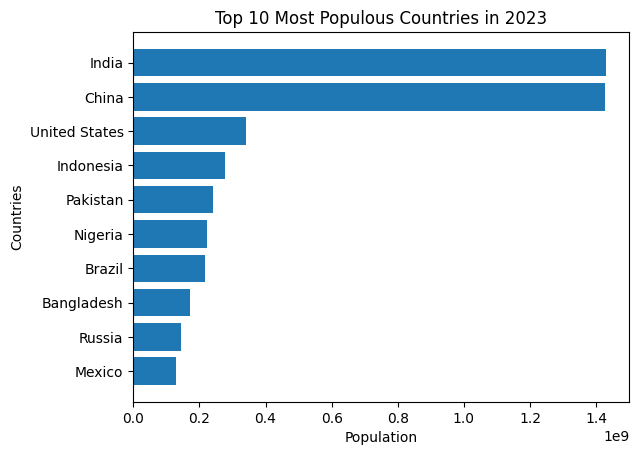

In [362]:
df = data.sort_values(by='Population2023', ascending=False).head(10)

countries= df['Country']
population = df['Population2023']

plt.barh(countries, population)
plt.xlabel('Population')
plt.ylabel('Countries')
plt.title('Top 10 Most Populous Countries in 2023')
plt.gca().invert_yaxis()
plt.show()

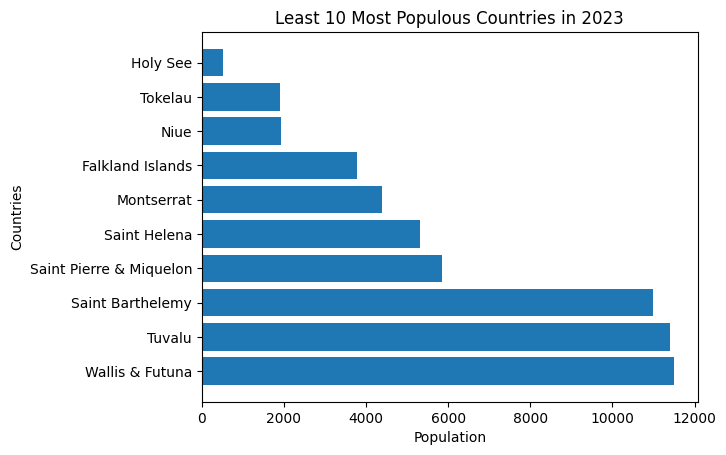

In [363]:
df = data.sort_values(by='Population2023', ascending=True).head(10)

countries= df['Country']
population = df['Population2023']

plt.barh(countries, population)
plt.xlabel('Population')
plt.ylabel('Countries')
plt.title('Least 10 Most Populous Countries in 2023')
plt.gca().invert_yaxis()
plt.show()

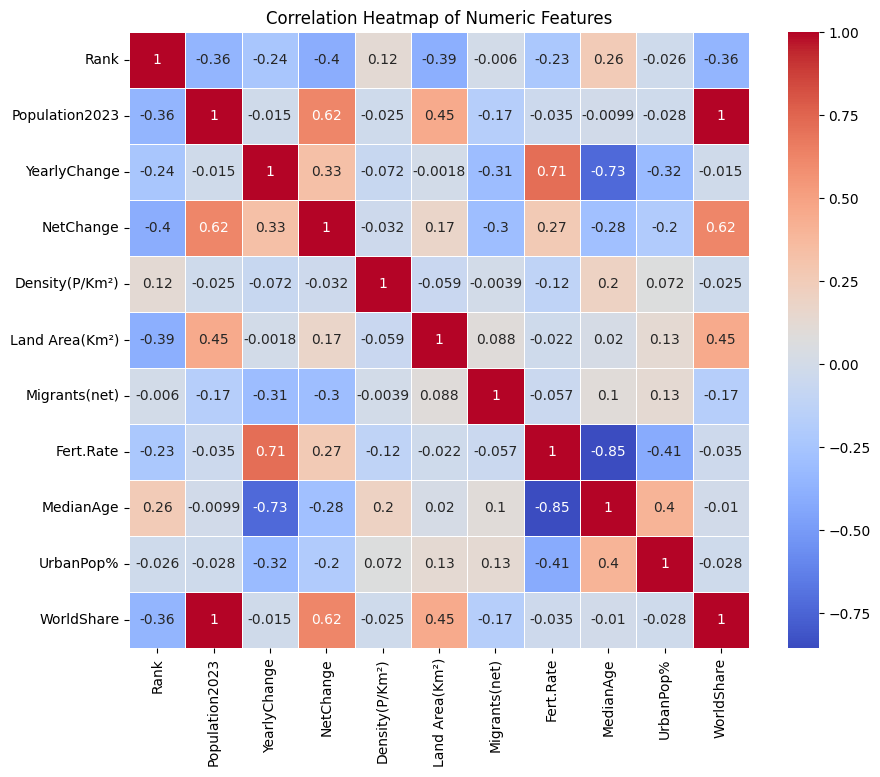

In [364]:
# Select the numeric features
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

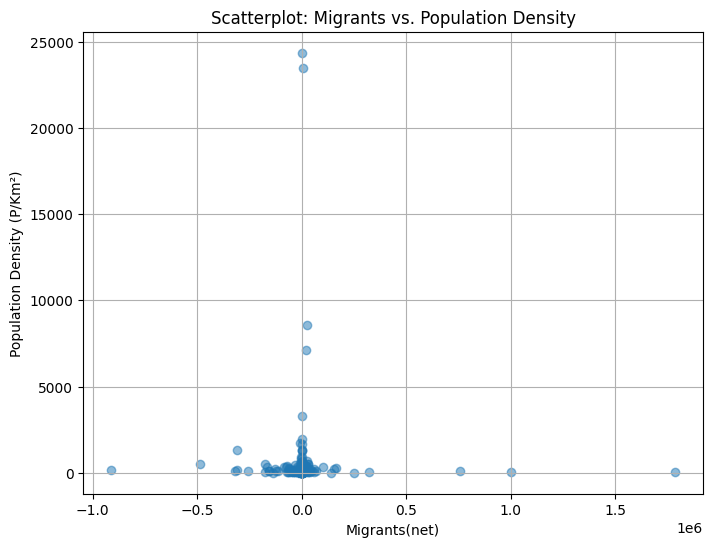

In [365]:
# Scatterplot: Migrants vs. Population Density
plt.figure(figsize=(8, 6))
plt.scatter(data['Migrants(net)'], data['Density(P/Km²)'], alpha=0.5)
plt.xlabel('Migrants(net)')
plt.ylabel('Population Density (P/Km²)')
plt.title('Scatterplot: Migrants vs. Population Density')
plt.grid(True)
plt.show()

## From the scatterplot, I can derive the following insights:

Migrants vs. Population Density:

There doesn't appear to be a strong linear relationship between the number of migrants and population density.
Most data points are concentrated in the lower range of population density, indicating that many countries have lower population densities.
Some countries with higher population densities have fleeting numbers of migrants, suggesting that population density alone may not be the primary factor influencing migration.

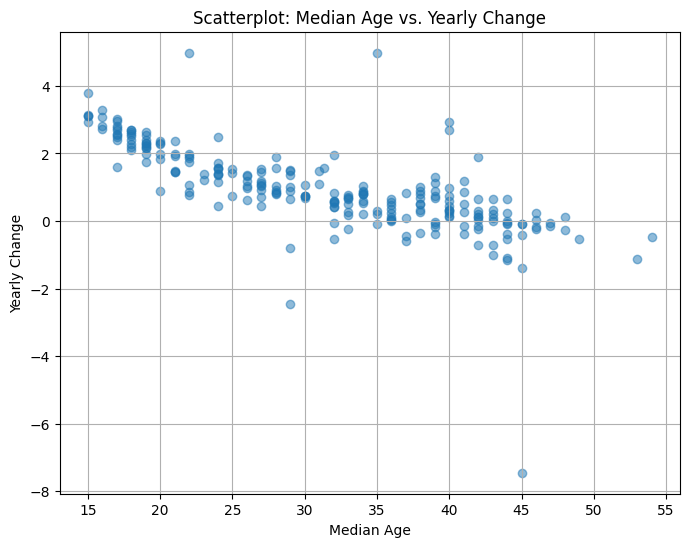

In [366]:
# Scatterplot: Median Age vs. Yearly Change
plt.figure(figsize=(8, 6))
plt.scatter(data['MedianAge'], data['YearlyChange'], alpha=0.5)
plt.xlabel('Median Age')
plt.ylabel('Yearly Change')
plt.title('Scatterplot: Median Age vs. Yearly Change')
plt.grid(True)
plt.show()

## Median Age and Yearly Change:

There doesn't seem to be a clear linear relationship between the median age of a country's population and its yearly population change.
Data points are scattered across the plot, indicating that countries with different median ages can experience various rates of population change.

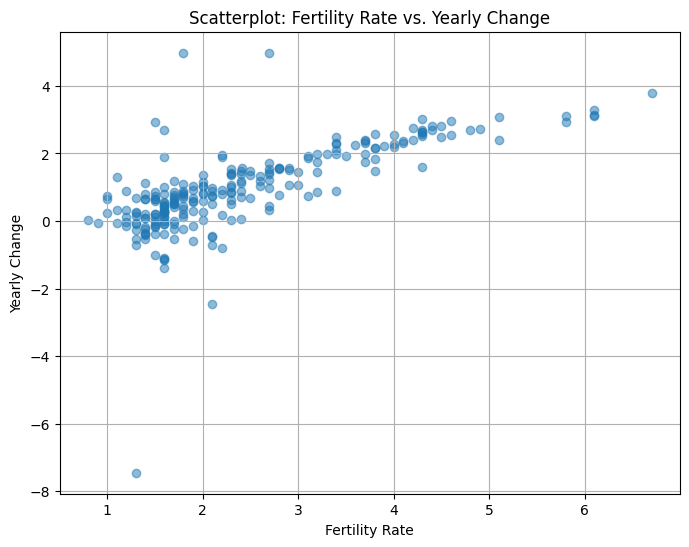

In [367]:
# Scatterplot: Fertility Rate vs. Yearly Change
plt.figure(figsize=(8, 6))
plt.scatter(data['Fert.Rate'], data['YearlyChange'], alpha=0.5)
plt.xlabel('Fertility Rate')
plt.ylabel('Yearly Change')
plt.title('Scatterplot: Fertility Rate vs. Yearly Change')
plt.grid(True)
plt.show()

## Fertility Rate and Yearly Change:

There isn't a strong linear correlation between fertility rate and yearly population change.
Data points are spread across the plot, suggesting that countries with different fertility rates can experience different rates of population change.
This scatterplot highlights that fertility rate alone may not be the sole determinant of population change, as other factors can also contribute.